In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
dataset="drive/My Drive/IMDB Dataset.csv"

In [ ]:
df=pd.read_csv(dataset)

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
from bs4 import BeautifulSoup
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [ ]:
import re
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [ ]:
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [ ]:
df['review']=df['review'].apply(denoise_text)

In [ ]:
df.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [ ]:
def Convert_to_bin(text, remove_digits=True):
    if text=='positive':
      text= 1
    else:
      text=0
    return text

In [ ]:
df['review']=df['review'].apply(remove_special_characters)

In [ ]:
df['sentiment']=df['sentiment'].apply(Convert_to_bin)

In [ ]:
df.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production The filming tech...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically theres a family where a little boy J...,0
4,Petter Matteis Love in the Time of Money is a ...,1
5,Probably my alltime favorite movie a story of ...,1
6,I sure would like to see a resurrection of a u...,1
7,This show was an amazing fresh innovative ide...,0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df['review'].values

In [ ]:
Y=df['sentiment'].values

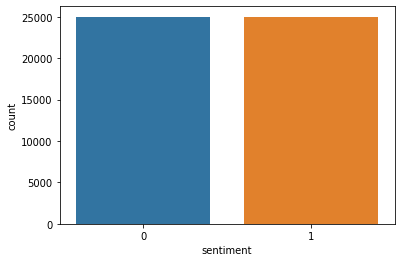

In [ ]:
import seaborn as sns
sns.countplot(df['sentiment'])

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3)

## Artificial Neural Networks Application

## Vectorizers :Bag of words


**Vectorizers**: In this method, we create a single feature vector using all the words in the vocubulary. Each word is basically  reagrded as a feature. So, the number of features is equal to the number of unique words in the vocab. Now, each sentence or review is a sample or record. Now, if the word is present in that sample it has some values and if the word is not present it is zero. Also called bag of words model

So, each sample has the same feature set size which is equal to the size of the vocabulary. Now, the vocabuary is basically made of the words in the train set. All the samples of the train and test set is fit using this vocabulary only. So, there may be some words in the test samples which are not present in the vocabulary, they are ignored. 

Now, they form very sparse matrices or feature sets. Now, similar to a normal classification problem, the words become features of the record and the corresponding tag becomes the target value. So, it is actually like a common classification problem with number of features being equal to the distinct tokens in the training set.

This can be done in two ways:



1. Count Vectorizer: Here the count of a word in a particular sample or review. The count of that word becomes the value of the corresponding word feature. If a word in the vocab does not appear in the sample its value is 0. 

2. TF-IDF Vectorizer: It is a better approach. It calculates two things term frequency and inverse document frequency. Term frequency= No. of times the word appears in the sample. IDF = log ( number of time the word appears in the sample / number of time the word appears in the whole document). This helps to note some differences like the word "The" appears with same freq in almost all sentences while special words carrying significance like "good" don't. So, these TF and IDF terms are multiplied to obtain the vector formats for each sample. 

#### Count Vectorizers

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vec = CountVectorizer()

In [ ]:
vec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
x_train=vec.transform(X_train)

In [ ]:
x_test=vec.transform(X_test)

In [ ]:
x_train

<35000x177470 sparse matrix of type '<class 'numpy.int64'>'
	with 4767914 stored elements in Compressed Sparse Row format>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Dense(16, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                2839536   
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 2,839,825
Trainable params: 2,839,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, Y_train,epochs=100,verbose=True,batch_size=16)

Epoch 1/100
2188/2188 [==============================] - 6s 3ms/step - loss: 0.3146 - accuracy: 0.8744
Epoch 2/100
2188/2188 [==============================] - 6s 3ms/step - loss: 0.1149 - accuracy: 0.9576
Epoch 3/100
2188/2188 [==============================] - 6s 3ms/step - loss: 0.0499 - accuracy: 0.9821
Epoch 4/100
2188/2188 [==============================] - 6s 3ms/step - loss: 0.0287 - accuracy: 0.9897
Epoch 5/100
2188/2188 [==============================] - 6s 3ms/step - loss: 0.0186 - accuracy: 0.9942
Epoch 6/100
2188/2188 [==============================] - 6s 3ms/step - loss: 0.0137 - accuracy: 0.9959
Epoch 7/100
2188/2188 [==============================] - 6s 3ms/step - loss: 0.0078 - accuracy: 0.9974
Epoch 8/100
2188/2188 [==============================] - 6s 3ms/step - loss: 0.0077 - accuracy: 0.9977
Epoch 9/100
2188/2188 [==============================] - 6s 3ms/step - loss: 0.0071 - accuracy: 0.9978
Epoch 10/100
2188/2188 [==============================] - 6s 3ms/step - l

In [ ]:
model.evaluate(x_train,Y_train)

1094/1094 [==============================] - 2s 2ms/step - loss: 6.4925e-11 - accuracy: 1.0000


[6.492464899032768e-11, 1.0]

In [ ]:
model.evaluate(x_test,Y_test)

469/469 [==============================] - 1s 2ms/step - loss: 3.1591 - accuracy: 0.8731


[3.1590538024902344, 0.8730666637420654]

In [ ]:
## Done

### TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vec = TfidfVectorizer()

In [ ]:
vec.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
x_train=vec.transform(X_train)

In [ ]:
x_test=vec.transform(X_test)

In [ ]:
x_train

<35000x176924 sparse matrix of type '<class 'numpy.float64'>'
	with 4778597 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
score_test = lr.score(x_test, Y_test)

In [ ]:
score_test

0.8941333333333333

In [ ]:
score_train = lr.score(x_train, Y_train)

In [ ]:
score_train

0.9325428571428571

In [ ]:
## Done

## Word Embedding : Time series model

**Word Embedding**: In this method, the words are individually represented as a vector. In case of the bag of words all of the words made up a vector. Here, there are 100 words in a vocabulary, so, a specific word will be represented by a vector of size 100 where the index corresponding to that word will be equal to 1, and others will be 0. 

So, Each sample having different number of words will basically have a different number of vectors, as each word is equal to a vector. Now, to feed a model we will need to have the same dimension for each sample, and as a result padding is needed to make the number of words in each sample equal to each other.  

Basically in the bag of words or vectorizer approach, if we have 100 words in our total vocabulary, and a sample with 10 words and a sample with 15 words, after vectorization both the sample sizes would be an array of 100 words, but here for the 10 words it will be a (10 x 100) i,e 100 length vector for each of the 10 words and similarly for 15th one size will be (15 x 100). So, we need to find the longest sample and pad all others up to match the size.

We can do this in some ways:

One-Hot encoding: It is just taking the size of the vocabulary and making an array of that size with 0's at all indices and 1 at only the index of the word. But this things provides us with a very less information.

The Second Choice is word embeddings.

The one hot encoder is a pretty hard coded approach. It is of a very high dimension and sparse with a very low amount of data. **Embedding is a way to create a dense vector representation out of the sparse representations.** It is of a lower dimension and helps to capture much more informations. It more like captures the relation and similarities between words using how they appear close to each other. For example, king, queen, men and women will have some relations. 

Say, we are having 10k words are being embedded in a 300 dimensional embedding space. To do this, we declare the number of nodes in the embedding layer =300. Now, each word of the 10k words enter the embedding layer as a 10k sized individual vector, Now, each of the words will be placed in 300 dimensional plane based on their similarities with one another which is decieded by several factors, like the order in which the words occur. Now, being placed in 300 Dimensional plane the words will have a 300 length tuple to represent it which are actually the coordinates of the point on the 300 dimensional plane. So, this 300 dimensional tuple becomes the new feature set or representing vector for the word. 

So, the vector for the word decreased from 10k to 300. The tuples serve as feature vectors between two words and the cosine angle between the vectors represent the similarity between the two words.

We can do this in two ways:

1. Using our own embeddings

2. Using pretrained embeddings

**Making our own embedding** 

Now, for the embedding we need to enter the sparse feature vectors first then move to making them dense using embedding. 

For creating the sparse matrix here, we need to use a tensorflow tokenizer, tokenizes the text to tokens. It can be done in mainly three ways:
1. Binary: X = tokenizer.sequences_to_matrix(x, mode='binary') : In this case, its simply like one hot encoding, 1 for the word 0 for others

2. Count: X = tokenizer.sequences_to_matrix(x, mode='count') : In this case, it is the number of times a word appear in the sentence.

3. TF-IDF: X  = tokenizer.sequences_to_matrix(x, mode='tfidf') : In this we consider the TF of the word in the sample and IDF of the word in the sample with resect to the occurence of the word in the whole document.  

Then we feed the vectors to the embedding layer. 

**Using pretrained embedded matrices**

We can use pretrained word embeddings like word2vec by google and GloveText by standford.They are trained on huge corpuses with billions of examples and words. Now, they have billions of words we have only a 10k so, training our model with a billion words will be very inefficient, So, we need to just select out our required word's embeddings from their pretrained embeddings.

Now, **How are these embeddings found?** 

For google's word2vec implementations, there are two ways:

1. Continous bag of words
2. Spin Gram.

Both of these algorithms actually use a Neural Network with a single hidden layer to generate the embedding.

Now, for CBOW, the context of the words , i.e, the words befor and after the required words are fed to the neural network, and the model is needed to predict the word. 

For the Spin-Gram, the words are given and the model has to predict the context words.

In both cases, the feature vectors or encoded vectors of the words are fed to the input. The output has a softmax layer with number of nodes equal to the vocabulary size, which gives the percentage of prediction for each word. Though we don't use the output layer actually. 

We go for the weight matrix produced in the hidden layer. **The number of nodes in the hidden layer is equal to the embedding dimension.** So, say if there are 10k words in a vocabulary and 300 nodes in the ghidden layer, each node in the hidden layer will have an array of weights of dimension of 10k for each word after training. 

Because the neural network units work on

y=f(w1x1+w2x2+..........wnxn)

Here x1, x2...... xn are the words and so n= number of words in vocabulary=10k. 

So for 10k x's there will be 10k w's. Now foe 1 node there are 10k length weight matrix. For 300 combined we have a matrix of 300 x 10k wieghts. Now, if we concatenate, we will have 300 rows and 10k columns. Let's transpose the matrix. We will get 300 columns and 10k rows. Each row represents a word, and the 300 column values represent a 300 length wieght vector for that word.

This weight vector is the obtained embedding of length 300.

### Training own vector

In [ ]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [ ]:
tokenizer = Tokenizer(num_words=10000)

In [ ]:
tokenizer.fit_on_texts(X_train)

1) tokenize.fit_on_text() -->> Creates the vocabulary index based on word frequency. For example, if you had the phrase "My dog is different from your dog, my dog is prettier", word_index["dog"] = 0, word_index["is"] = 1 (dog appears 3 times, is appears 2 times)

2) tokenize.text_to_sequence() -->> Transforms each text into a sequence of integers. Basically if you had a sentence, it would assign an integer to each word from your sentence. You can access tokenizer.word_index() (returns a dictionary) to verify the assigned integer to your word.

In [ ]:
x_train = tokenizer.texts_to_sequences(X_train) 

In [ ]:
x_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
vocab = len(tokenizer.word_index) + 1  

+1 for padding

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
maxlen = 100

In [ ]:
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense, Activation, MaxPool1D
from tensorflow.keras.optimizers import Adam
emb_dim=100

model= Sequential()
model.add(Embedding(input_dim=vocab, output_dim=emb_dim, input_length=maxlen))
model.add(MaxPool1D())
model.add(Dense(16,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

Maxpooling is used to convert the sparse matrix denser

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          17754200  
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 50, 100)           0         
_________________________________________________________________
dense_24 (Dense)             (None, 50, 16)            1616      
_________________________________________________________________
dense_25 (Dense)             (None, 50, 16)            272       
_________________________________________________________________
dense_26 (Dense)             (None, 50, 1)             17        
Total params: 17,756,105
Trainable params: 17,756,105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, Y_train,epochs=35,verbose=True,batch_size=16)

Here at each step the model weights as well as the embedding dimensions are getting corrected

In [ ]:
test_score=model.evaluate(x_test,Y_test)

In [ ]:
test_score

In [ ]:
train_score=model.evaluate(x_train,Y_train)

In [ ]:
train_score

### Train accuray 83.7
### Test accuracy 72.4